<a href="https://colab.research.google.com/github/boiBASH/Tolaram_Projecct/blob/main/First_Tolaram_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = "/content/drive/MyDrive/Data Analysis - Sample File.csv"
df = pd.read_csv(file_path)

<ipython-input-4-bdc699a5e123>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df.head()

,Brand,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value
0,1,FIELD EXECUTIVE,10002778,807259,8060733751,11432770,05/08/2024 00:00,3.0,"46,500"
1,1,FIELD EXECUTIVE,10002778,807881,9016204667,11565436,26/08/2024 00:00,1.0,"15,500"
2,1,FIELD EXECUTIVE,10002778,807881,9016204667,11727113,17/09/2024 00:00,1.0,"15,500"
3,1,FIELD EXECUTIVE,10002778,807881,8060359775,11756045,20/09/2024 00:00,1.0,"15,500"
4,1,FIELD EXECUTIVE,10002778,807881,9075013565,11585122,29/08/2024 00:00,1.0,"15,500"


In [6]:
df.describe()

,Brand,Customer_Phone,Order_Id,Delivered Qty
count,108825.000000,1.088250e+05,1.088250e+05,108822.000000
mean,5.083620,7.962613e+09,1.216011e+07,2.728621
std,2.409741,5.185237e+08,3.714615e+05,6.623944
min,1.000000,7.010010e+09,1.045971e+07,0.000000
25%,4.000000,8.025464e+09,1.186294e+07,1.000000
50%,5.000000,8.038774e+09,1.218053e+07,1.000000
75%,8.000000,8.121232e+09,1.248787e+07,2.000000
max,9.000000,9.169811e+09,1.276046e+07,401.000000


In [7]:
df.nunique()

,0
Brand,9
Designation,5
SKU_Code,194
Salesman_Code,183
Customer_Phone,4011
Order_Id,67721
Delivered_date,159
Delivered Qty,116
Redistribution Value,1604


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108825 entries, 0 to 108824
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 108825 non-null  int64  
 1   Designation           108825 non-null  object 
 2   SKU_Code              108825 non-null  object 
 3   Salesman_Code         108825 non-null  object 
 4   Customer_Phone        108825 non-null  int64  
 5   Order_Id              108825 non-null  int64  
 6   Delivered_date        108825 non-null  object 
 7   Delivered Qty         108822 non-null  float64
 8   Redistribution Value  108825 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.5+ MB


In [9]:
# Clean the data before creating a data dictionary

# Clean "Redistribution Value" by removing commas and converting to float
df['Redistribution Value'] = df['Redistribution Value'].str.replace(',', '').astype(float)

# Convert 'Delivered_date' to datetime
df['Delivered_date'] = pd.to_datetime(df['Delivered_date'], errors='coerce')

# Display data types and unique values to create the data dictionary
data_dictionary = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

data_dictionary

,Column Name,Data Type,Missing Values,Unique Values
0,Brand,int64,0,9
1,Designation,object,0,5
2,SKU_Code,object,0,194
3,Salesman_Code,object,0,183
4,Customer_Phone,int64,0,4011
5,Order_Id,int64,0,67721
6,Delivered_date,datetime64[ns],69513,61
7,Delivered Qty,float64,3,116
8,Redistribution Value,float64,0,1604


## EDA: Aggregating key metrics over time

# 1. Total Redistribution Value over time
# 2. Number of orders over time

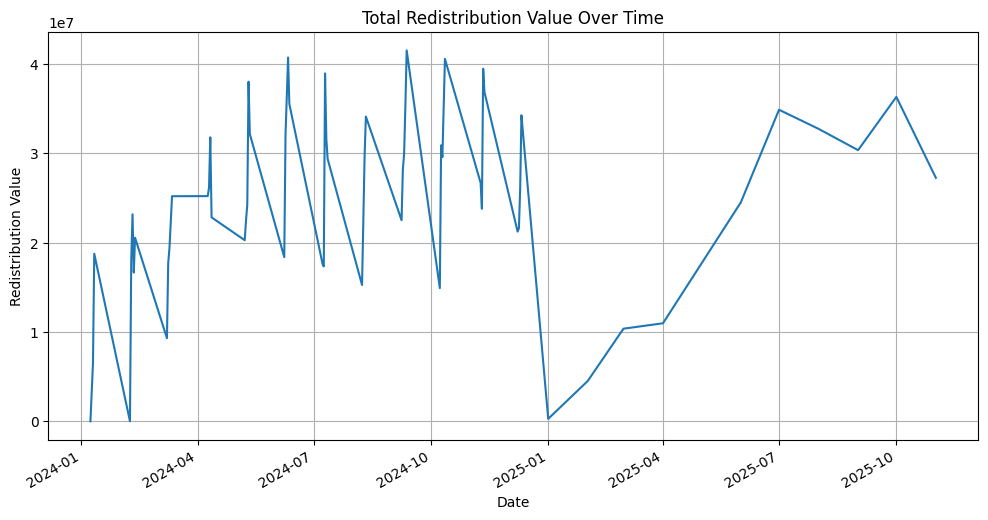

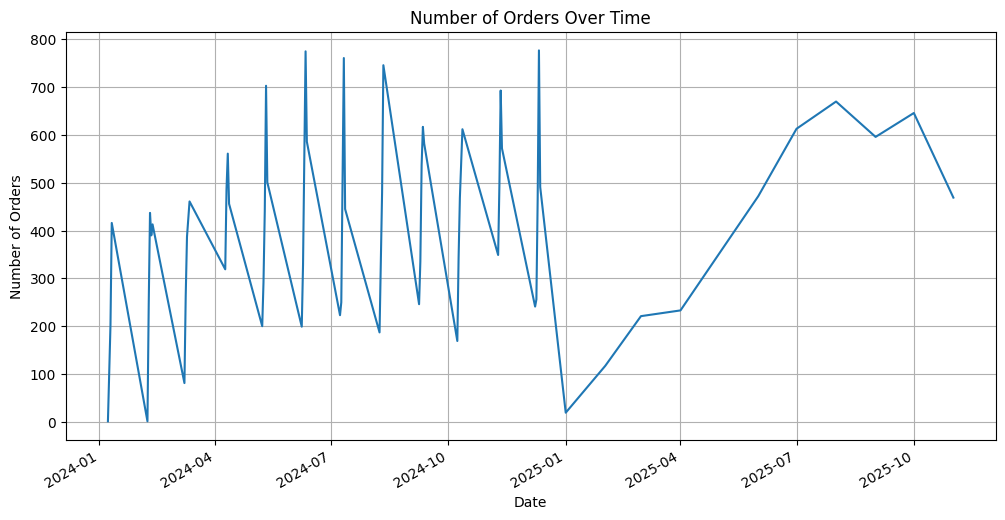

In [10]:
# Group by date
daily_summary = df.groupby('Delivered_date').agg({
    'Redistribution Value': 'sum',
    'Order_Id': 'nunique'
}).rename(columns={'Order_Id': 'Number of Orders'})

# Plot total sales over time
plt.figure(figsize=(12, 6))
daily_summary['Redistribution Value'].plot()
plt.title("Total Redistribution Value Over Time")
plt.xlabel("Date")
plt.ylabel("Redistribution Value")
plt.grid(True)
plt.show()

# Plot number of orders over time
plt.figure(figsize=(12, 6))
daily_summary['Number of Orders'].plot()
plt.title("Number of Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

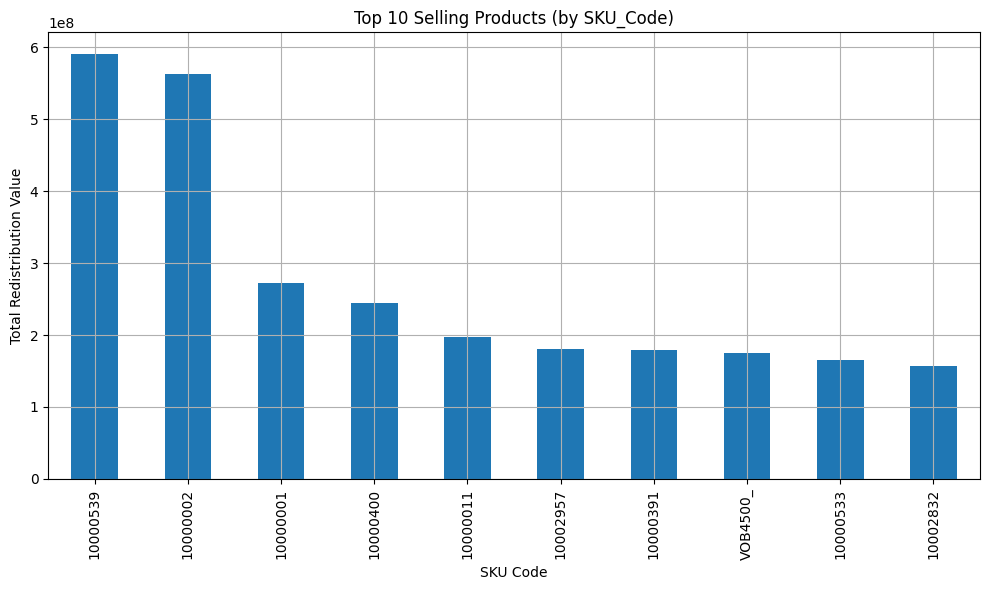

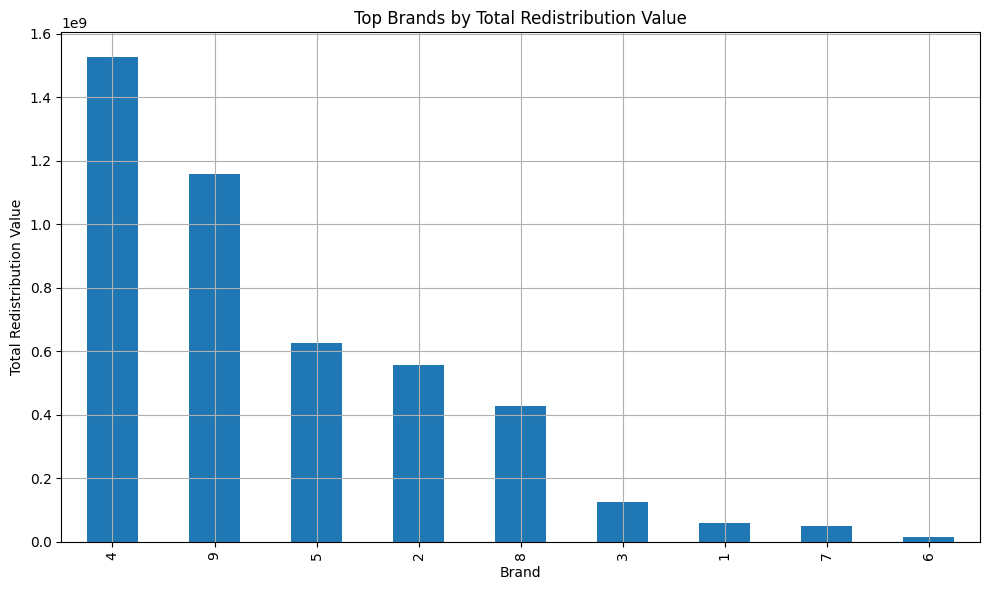

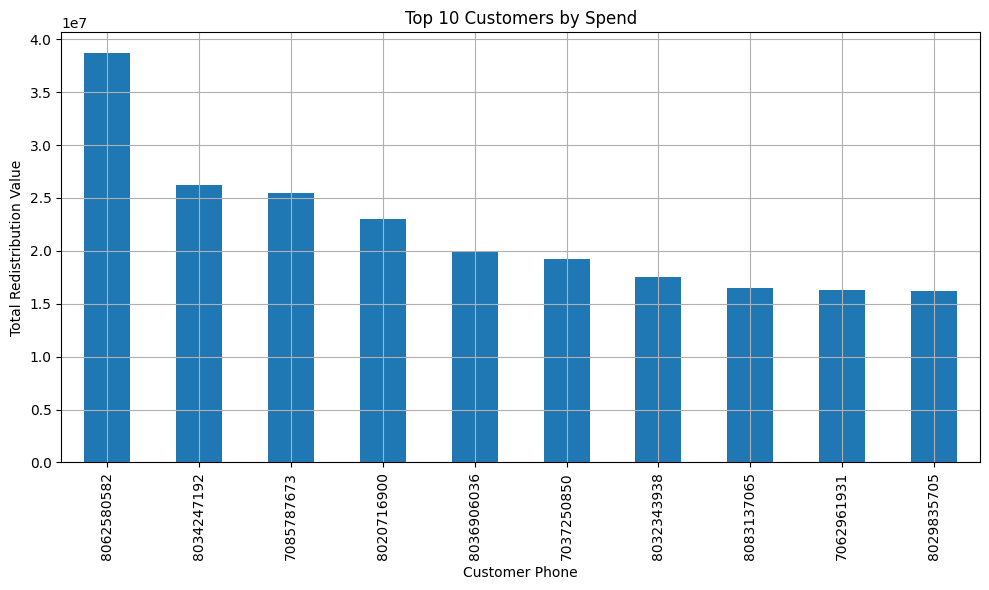

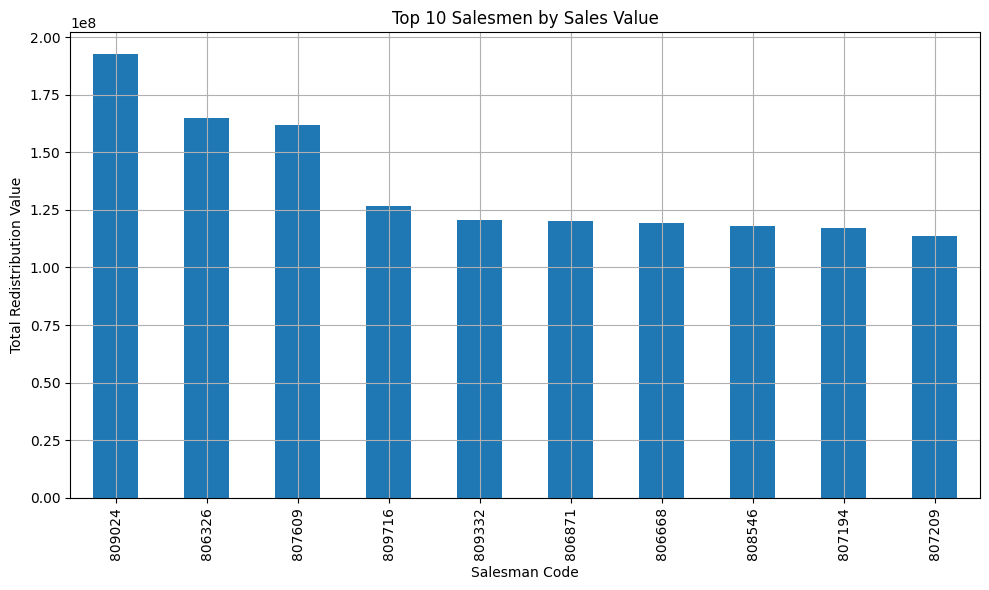

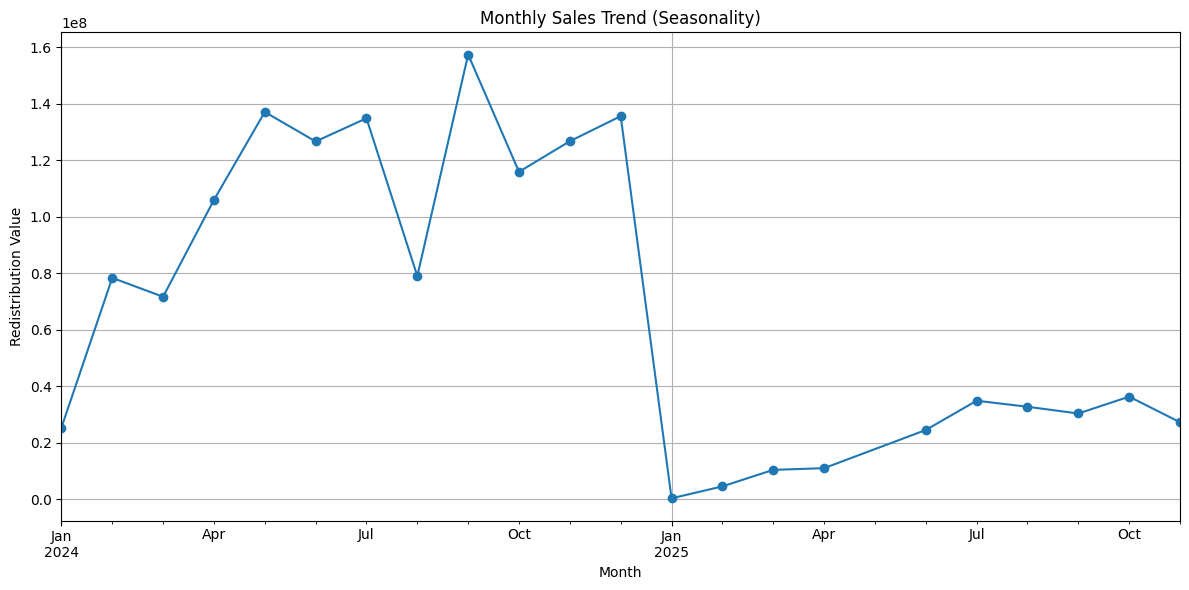

In [11]:
# Top-selling products and brands
top_products = df.groupby('SKU_Code')['Redistribution Value'].sum().sort_values(ascending=False).head(10)
top_brands = df.groupby('Brand')['Redistribution Value'].sum().sort_values(ascending=False)

# Most active customers and salesmen
top_customers = df.groupby('Customer_Phone')['Redistribution Value'].sum().sort_values(ascending=False).head(10)
top_salesmen = df.groupby('Salesman_Code')['Redistribution Value'].sum().sort_values(ascending=False).head(10)

# Purchase seasonality - average monthly sales
df['Month'] = df['Delivered_date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Redistribution Value'].sum()

# Plotting
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title("Top 10 Selling Products (by SKU_Code)")
plt.ylabel("Total Redistribution Value")
plt.xlabel("SKU Code")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar')
plt.title("Top Brands by Total Redistribution Value")
plt.ylabel("Total Redistribution Value")
plt.xlabel("Brand")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Spend")
plt.ylabel("Total Redistribution Value")
plt.xlabel("Customer Phone")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_salesmen.plot(kind='bar')
plt.title("Top 10 Salesmen by Sales Value")
plt.ylabel("Total Redistribution Value")
plt.xlabel("Salesman Code")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend (Seasonality)")
plt.ylabel("Redistribution Value")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Top Insights**



*   Top-Selling Products: revenue-generating SKUs — great candidates for upselling or bundling.
*   Top Brands: Which brands dominate the revenue — useful for focusing marketing or stock efforts.
*   Top Customers: The customers driving the most sales — worth retaining with loyalty perks or personalized offers.
*   Top Salesmen: Who’s performing best on the ground — great for benchmarking or training others.
*   Monthly Sales Trend: Shows clear seasonality or periodic patterns in purchasing behaviour.







In [12]:
# Calculate monthly sales per brand
brand_monthly = df.groupby(['Brand', df['Delivered_date'].dt.to_period('M')])['Redistribution Value'].sum().unstack(fill_value=0)

# Calculate month-over-month percent change
brand_mom_change = brand_monthly.pct_change(axis=1) * 100

# Flag significant drops (more than 30%)
brand_drop_flags = brand_mom_change < -30

brand_drop_summary = brand_mom_change.round(2).astype(str)
brand_drop_summary[brand_drop_flags] += '% 🔻'
brand_drop_summary[~brand_drop_flags] = ''


brand_drop_summary

Delivered_date,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,...,2025-01,2025-02,2025-03,2025-04,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
Brand,,,,,,,,,,,,,,,,,,,,,
1,,,,,,-35.38% 🔻,,,,-36.54% 🔻,...,-100.0% 🔻,,,,,,,-36.56% 🔻,,-75.34% 🔻
2,,,-34.45% 🔻,,,,,-48.12% 🔻,,-51.47% 🔻,...,-99.72% 🔻,,,,,,,-30.99% 🔻,,
3,,,,,,,,,,,...,-99.09% 🔻,,,-42.89% 🔻,,-32.16% 🔻,,,,-48.78% 🔻
4,,,,,,,,-34.41% 🔻,,,...,-100.0% 🔻,,,,,,-40.16% 🔻,,,
5,,,,,,,,,,,...,-99.35% 🔻,,,,,,,-36.0% 🔻,,
6,,,,,,,,,,,...,,,,,,,,-88.16% 🔻,,-71.43% 🔻
7,,,,-31.12% 🔻,,,,,,,...,-100.0% 🔻,,,-55.56% 🔻,,,-71.59% 🔻,,,-63.48% 🔻
8,,,,,,,,-58.57% 🔻,,,...,-98.94% 🔻,,,,,,,,,
9,,,,,,,,-57.3% 🔻,,,...,-100.0% 🔻,,,,,,,,,-38.88% 🔻


In [13]:
# Calculate monthly sales per salesman
salesman_monthly = df.groupby(['Salesman_Code', df['Delivered_date'].dt.to_period('M')])['Redistribution Value'].sum().unstack(fill_value=0)

# Calculate month-over-month percent change
salesman_mom_change = salesman_monthly.pct_change(axis=1) * 100

# Flag significant drops (more than 30%)
salesman_drop_flags = salesman_mom_change < -30


# Convert to string and mark drops
salesman_drop_summary = salesman_mom_change.round(2).astype(str)
salesman_drop_summary[salesman_drop_flags] += '% 🔻'
salesman_drop_summary[~salesman_drop_flags] = ''

salesman_drop_summary


Delivered_date,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,...,2025-01,2025-02,2025-03,2025-04,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
Salesman_Code,,,,,,,,,,,,,,,,,,,,,
806080,,,,,-57.64% 🔻,,,-41.09% 🔻,,-63.29% 🔻,...,-100.0% 🔻,,,,,,,,-33.32% 🔻,-92.38% 🔻
806326,,,,,,,,,,,...,-100.0% 🔻,,-100.0% 🔻,,,,,,,-83.63% 🔻
806589,,,-36.41% 🔻,,,,,-51.57% 🔻,,,...,-100.0% 🔻,,,,,,,,,-97.81% 🔻
806779,,,,,,-55.28% 🔻,-58.82% 🔻,-66.7% 🔻,,-74.77% 🔻,...,-100.0% 🔻,,,,,,-82.69% 🔻,,-33.45% 🔻,
806903,,,-100.0% 🔻,,-96.18% 🔻,,-81.1% 🔻,,,-91.53% 🔻,...,,,,,,-100.0% 🔻,,-100.0% 🔻,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810380,,,,,,,,,,-100.0% 🔻,...,,,,,,,,,,
810444,,,-78.55% 🔻,,,-71.37% 🔻,,-36.56% 🔻,,-81.66% 🔻,...,-100.0% 🔻,,,,-100.0% 🔻,,,,,
810667,,-57.08% 🔻,,,-35.98% 🔻,,,-100.0% 🔻,,,...,-100.0% 🔻,,-100.0% 🔻,,,,-38.56% 🔻,-100.0% 🔻,,-100.0% 🔻


# **RFM Analysis (Recency, Frequency, Monetary) for each customer**


In [14]:
from datetime import datetime

# Usimg the latest delivery date as the "current" date for recency calculation
reference_date = df['Delivered_date'].max()

# Grouping RFM values by Customer_Phone
rfm = df.groupby('Customer_Phone').agg({
    'Delivered_date': lambda x: (reference_date - x.max()).days,  # Recency
    'Order_Id': 'nunique',                                         # Frequency
    'Redistribution Value': 'sum'                                  # Monetary
}).reset_index()

rfm.columns = ['Customer_Phone', 'Recency', 'Frequency', 'Monetary']

# Quick summary of RFM segments (you can later use quantiles to segment)
rfm_summary = rfm.describe()

rfm_summary

,Customer_Phone,Recency,Frequency,Monetary
count,4.011000e+03,3608.000000,4011.000000,4.011000e+03
mean,7.969705e+09,203.751109,16.883819,1.133162e+06
std,5.211859e+08,171.778355,12.794597,1.761614e+06
min,7.010010e+09,0.000000,1.000000,4.500000e+02
25%,8.025692e+09,61.000000,7.000000,2.871000e+05
50%,8.038445e+09,123.000000,15.000000,6.710000e+05
75%,8.121468e+09,354.000000,24.000000,1.323162e+06
max,9.169811e+09,661.000000,107.000000,3.871910e+07


- 🥇 **Best Customers**: Low Recency, High Frequency, High Monetary
- 💤 **At-Risk Customers**: High Recency, Low Frequency
- 📉 **Big Spenders Dropping Off**: High Monetary, High Recency
- 🔄 **Potential Loyalists**: Medium Recency, Growing Frequency

In [15]:
# Defining thresholds using quantiles
recency_q = rfm['Recency'].quantile([0.25, 0.5, 0.75])
frequency_q = rfm['Frequency'].quantile([0.25, 0.5, 0.75])
monetary_q = rfm['Monetary'].quantile([0.25, 0.5, 0.75])

# Define segmentation logic
def rfm_segment(row):
    if row['Recency'] <= recency_q[0.25] and row['Frequency'] >= frequency_q[0.75] and row['Monetary'] >= monetary_q[0.75]:
        return 'Best Customers'
    elif row['Recency'] >= recency_q[0.75] and row['Frequency'] <= frequency_q[0.25]:
        return 'At-Risk Customers'
    elif row['Recency'] >= recency_q[0.75] and row['Monetary'] >= monetary_q[0.75]:
        return 'Big Spenders Dropping Off'
    elif recency_q[0.25] < row['Recency'] <= recency_q[0.75] and row['Frequency'] >= frequency_q[0.5]:
        return 'Potential Loyalists'
    else:
        return 'Others'

# Apply segmentation
rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Count customers in each segment
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Number of Customers']

segment_counts

,Segment,Number of Customers
0,Others,2251
1,Potential Loyalists,895
2,At-Risk Customers,403
3,Best Customers,351
4,Big Spenders Dropping Off,111


- 🥇 **Best Customers**: 351  
  Highly active, frequent buyers with strong monetary value — retain and reward these customers!

- 💤 **At-Risk Customers**: 649  
  Haven’t ordered in a while and didn’t order much in the past — reactivation campaigns could work.

- 📉 **Big Spenders Dropping Off**: 55  
  Used to spend a lot but have been silent recently — these are critical to win back!

- 🔄 **Potential Loyalists**: 987  
  Showing promising frequency — good targets for loyalty programs or upselling.

- 🧩 **Others**: 1969  
  Don't clearly fit the other buckets — usually newer, inconsistent, or average behavior.

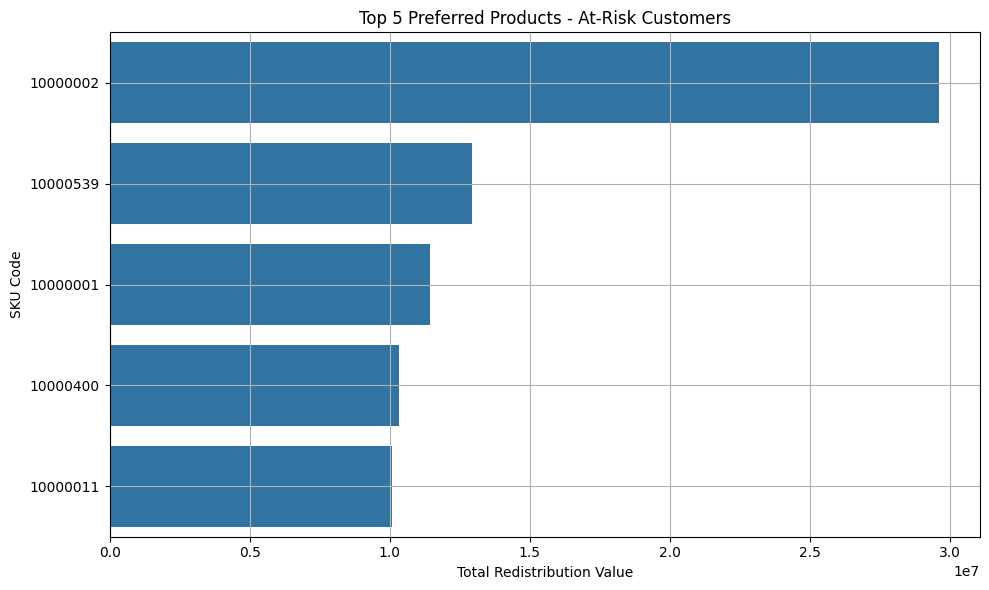

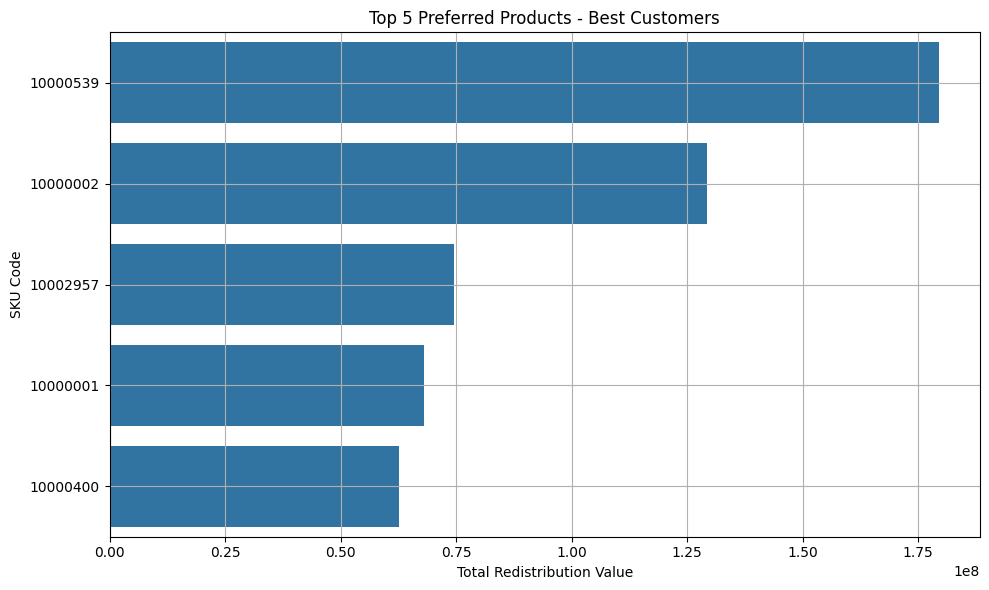

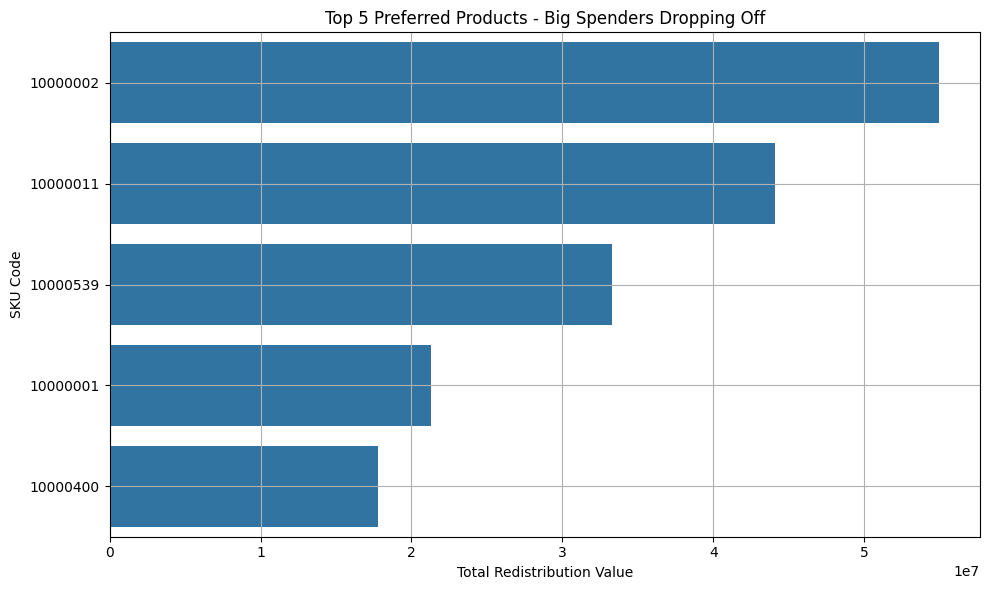

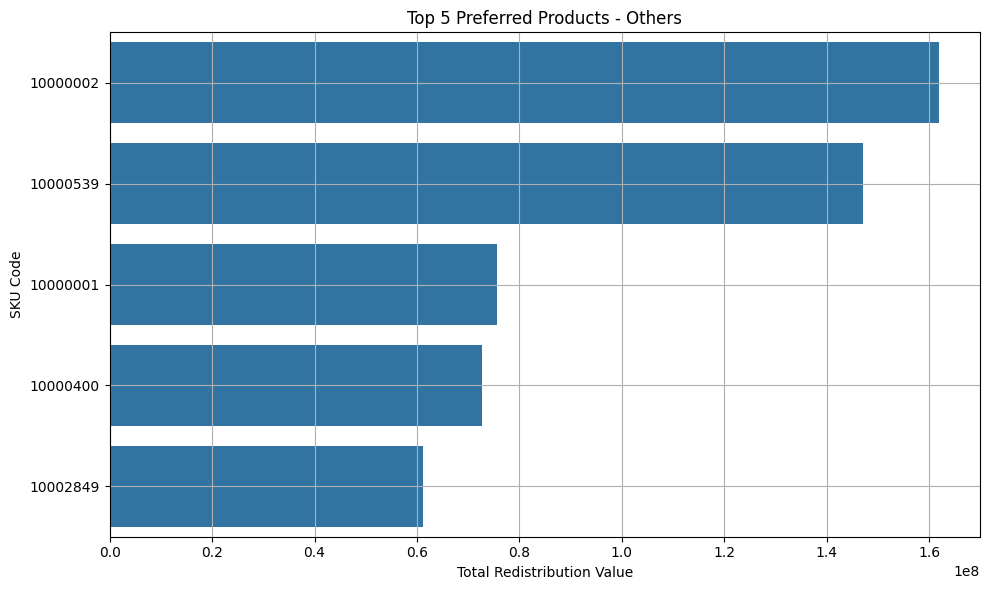

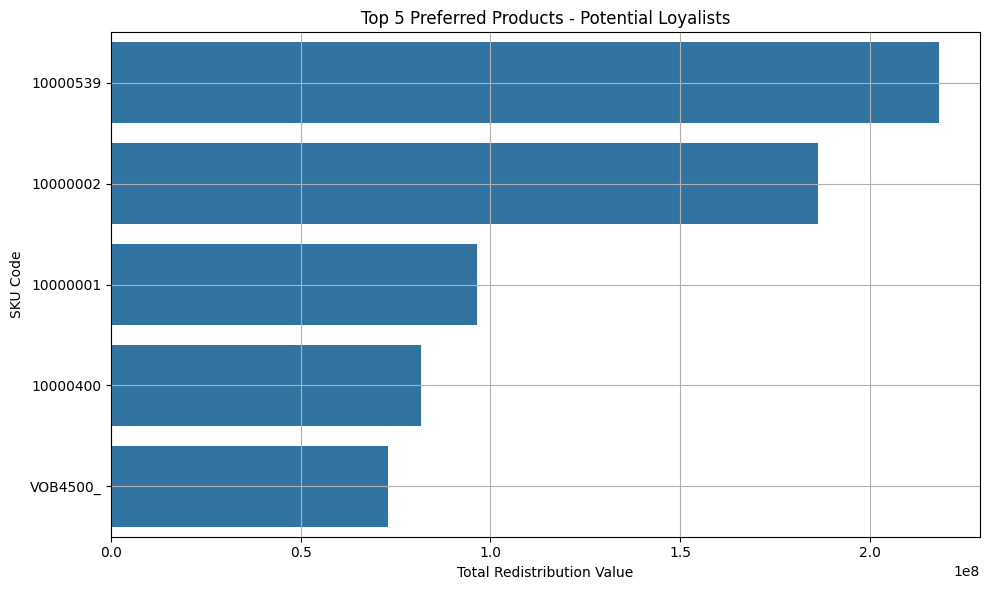

In [16]:
# Merge original data with RFM segments
df_rfm = df.merge(rfm[['Customer_Phone', 'Segment']], on='Customer_Phone')

# Analyze product (SKU_Code) preferences by segment
product_pref = df_rfm.groupby(['Segment', 'SKU_Code'])['Redistribution Value'].sum().reset_index()

# Top 5 products per segment based on total value
top_products_per_segment = product_pref.sort_values(['Segment', 'Redistribution Value'], ascending=[True, False])\
                                       .groupby('Segment').head(5)


segments = top_products_per_segment['Segment'].unique()

for segment in segments:
    segment_data = top_products_per_segment[top_products_per_segment['Segment'] == segment]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Redistribution Value', y='SKU_Code', data=segment_data, orient='h')
    plt.title(f"Top 5 Preferred Products - {segment}")
    plt.xlabel("Total Redistribution Value")
    plt.ylabel("SKU Code")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

- 🥇 **Best Customers** tend to favor high-value, possibly premium SKUs — ideal for loyalty and retention campaigns.

- 🔄 **Potential Loyalists** often purchase similar SKUs to Best Customers but in smaller or more consistent quantities — they’re ripe for upsell.

- 💤 **At-Risk Customers** show scattered or inconsistent preferences — some reactivation strategies could target their past favorites.

- 📉 **Big Spenders Dropping Off** focus heavily on a few big-ticket SKUs — these products might be over-priced now or less promoted.

- 🧩 **Others** show a diverse mix — a segment to watch for new trends or emerging preferences.

# **Cross-Selling Suggestions**


* Identify customers with declining purchases from one brand and recommend similar brands they’ve bought before or others with similar profiles have



In [17]:
# Step 1: Determine last month each customer purchased from each brand
df['Month'] = df['Delivered_date'].dt.to_period('M')
last_purchase = df.groupby(['Customer_Phone', 'Brand'])['Month'].max().reset_index()
last_purchase.columns = ['Customer_Phone', 'Brand', 'Last_Purchase_Month']

# Step 2: Identify customers who stopped purchasing a brand by comparing to the latest month
latest_month = df['Month'].max()
drop_off_customers = last_purchase[last_purchase['Last_Purchase_Month'] < latest_month]

# Step 3: For each drop-off customer, find what other brands they bought after dropping
# Filter data to purchases after their last purchase month for the dropped brand
merged = df.merge(drop_off_customers, on='Customer_Phone', suffixes=('', '_dropped'))

# Keep only rows where the purchase happened after the drop-off and is from a different brand
cross_brand_data = merged[
    (merged['Month'] > merged['Last_Purchase_Month']) &
    (merged['Brand'] != merged['Brand_dropped'])
]

# Recommend new brands based on most frequently bought ones post-drop
brand_recommendations = cross_brand_data.groupby(['Brand_dropped', 'Brand'])['Order_Id'].count().reset_index()
brand_recommendations.columns = ['Dropped_Brand', 'Recommended_Brand', 'Count']
top_recommendations = brand_recommendations.sort_values(['Dropped_Brand', 'Count'], ascending=[True, False])\
                                           .groupby('Dropped_Brand').head(3)

top_recommendations

,Dropped_Brand,Recommended_Brand,Count
2,1,4,1191
3,1,5,1060
6,1,8,661
11,2,5,1140
10,2,4,863
14,2,8,755
19,3,5,899
18,3,4,653
22,3,8,539
27,4,5,1360


In [18]:
cross_brand_with_segment = cross_brand_data.merge(
    rfm[['Customer_Phone', 'Segment']],
    on='Customer_Phone'
)

# Group by segment, original brand dropped, and new brand
segment_brand_switch = cross_brand_with_segment.groupby(
    ['Segment', 'Brand_dropped', 'Brand']
)['Order_Id'].count().reset_index()

segment_brand_switch.columns = ['Segment', 'Dropped_Brand', 'Recommended_Brand', 'Switch_Count']

# top 3 brand switches per segment for each dropped brand
top_segment_switches = segment_brand_switch.sort_values(
    ['Segment', 'Dropped_Brand', 'Switch_Count'],
    ascending=[True, True, False]
).groupby(['Segment', 'Dropped_Brand']).head(3)

top_segment_switches

,Segment,Dropped_Brand,Recommended_Brand,Switch_Count
2,At-Risk Customers,1,9,12
0,At-Risk Customers,1,4,9
1,At-Risk Customers,1,8,1
3,At-Risk Customers,2,8,1
4,At-Risk Customers,4,2,4
...,...,...,...,...
273,Potential Loyalists,8,4,418
277,Potential Loyalists,8,9,215
281,Potential Loyalists,9,4,312
282,Potential Loyalists,9,5,225


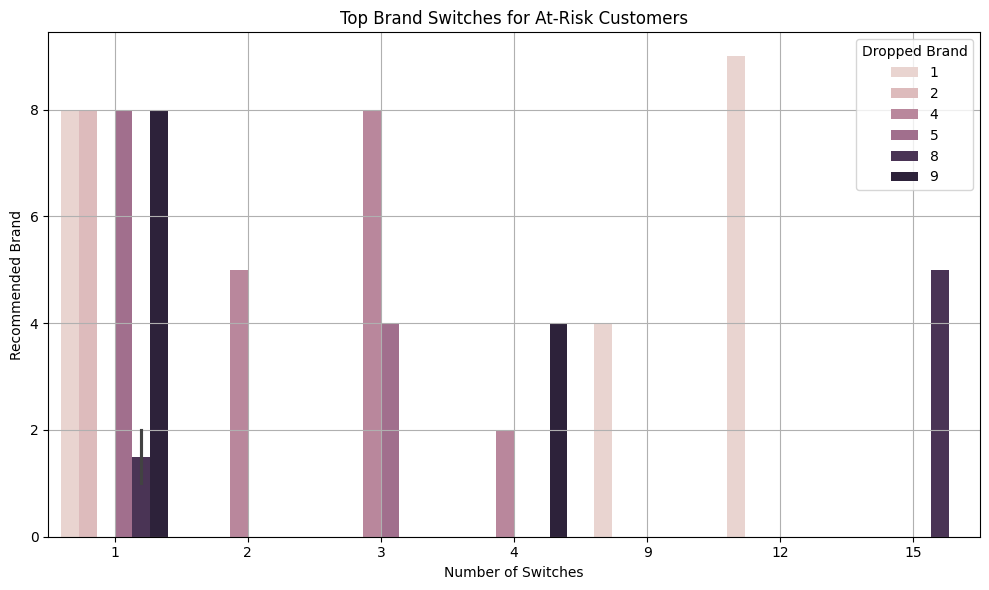

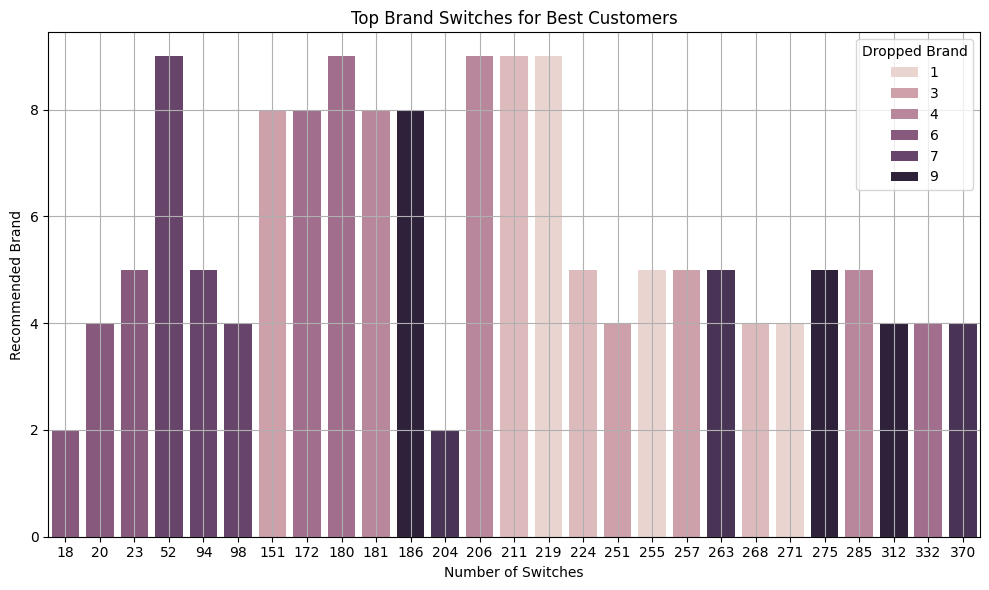

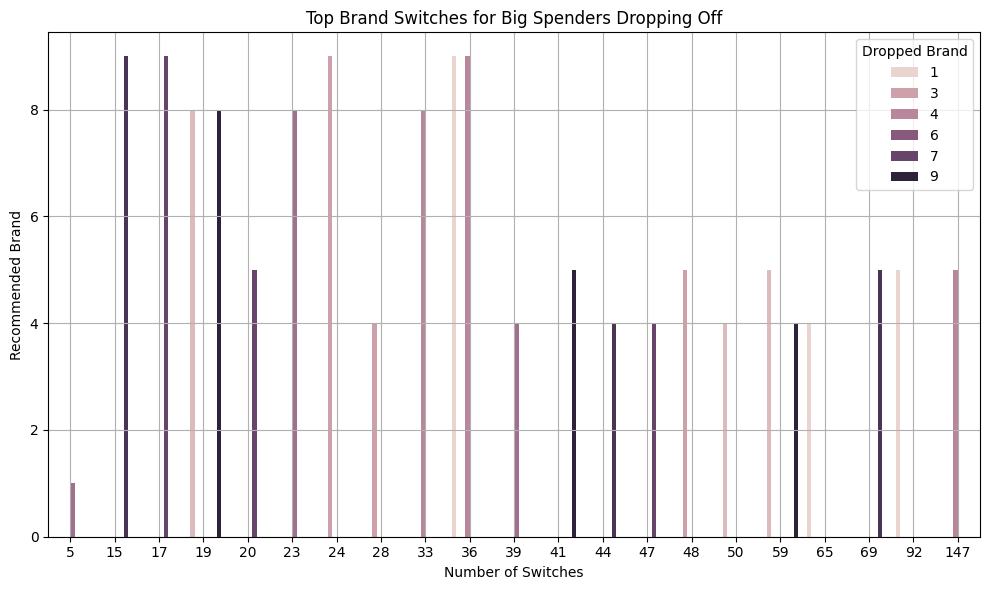

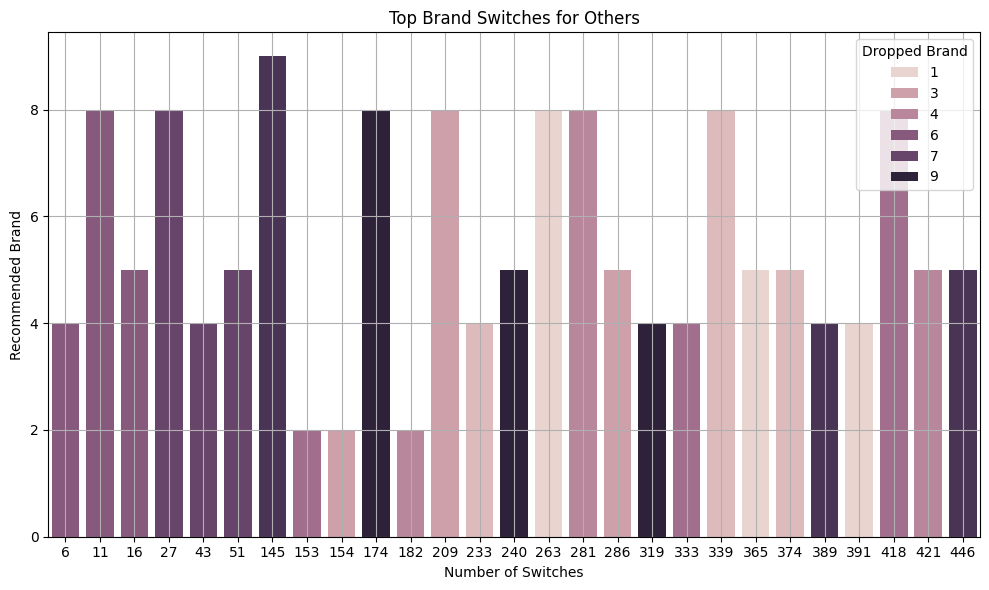

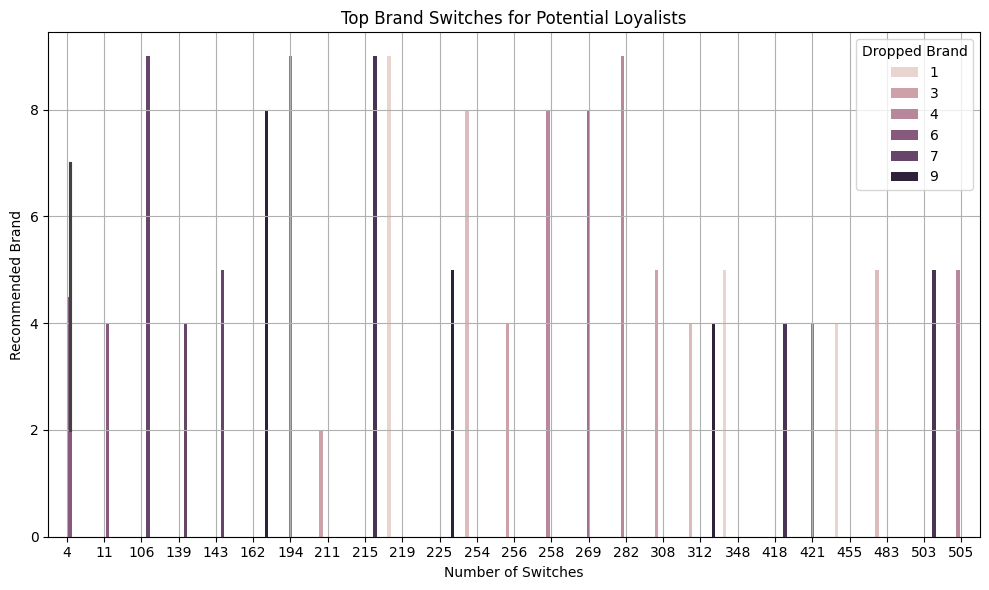

In [19]:
segments = top_segment_switches['Segment'].unique()

# Plot brand switch patterns for each customer segment separately
for segment in segments:
    segment_data = top_segment_switches[top_segment_switches['Segment'] == segment]
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=segment_data,
        x='Switch_Count',
        y='Recommended_Brand',
        hue='Dropped_Brand'
    )
    plt.title(f"Top Brand Switches for {segment}")
    plt.xlabel("Number of Switches")
    plt.ylabel("Recommended Brand")
    plt.legend(title='Dropped Brand')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# **Correlation Between Brand**

In [20]:
# Create a customer-brand matrix (binary: 1 if purchased, 0 if not)
customer_brand_matrix = df.groupby(['Customer_Phone', 'Brand'])['Order_Id'].count().unstack(fill_value=0)
customer_brand_matrix = customer_brand_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Compute correlation matrix between brands
brand_correlation = customer_brand_matrix.corr()

# Round for easier readability
brand_correlation_rounded = brand_correlation.round(2)

brand_correlation_rounded

<ipython-input-20-d5927f69e7f4>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_brand_matrix = customer_brand_matrix.applymap(lambda x: 1 if x > 0 else 0)


Brand,1,2,3,4,5,6,7,8,9
Brand,,,,,,,,,
1,1.00,0.08,0.16,0.25,0.18,0.12,0.25,0.17,0.25
2,0.08,1.00,0.50,0.02,0.21,0.06,0.15,0.23,0.10
3,0.16,0.50,1.00,0.09,0.24,0.07,0.21,0.25,0.18
4,0.25,0.02,0.09,1.00,0.04,0.10,0.19,0.12,0.24
5,0.18,0.21,0.24,0.04,1.00,0.08,0.20,0.42,0.08
6,0.12,0.06,0.07,0.10,0.08,1.00,0.38,0.11,0.22
7,0.25,0.15,0.21,0.19,0.20,0.38,1.00,0.16,0.22
8,0.17,0.23,0.25,0.12,0.42,0.11,0.16,1.00,0.15
9,0.25,0.10,0.18,0.24,0.08,0.22,0.22,0.15,1.00


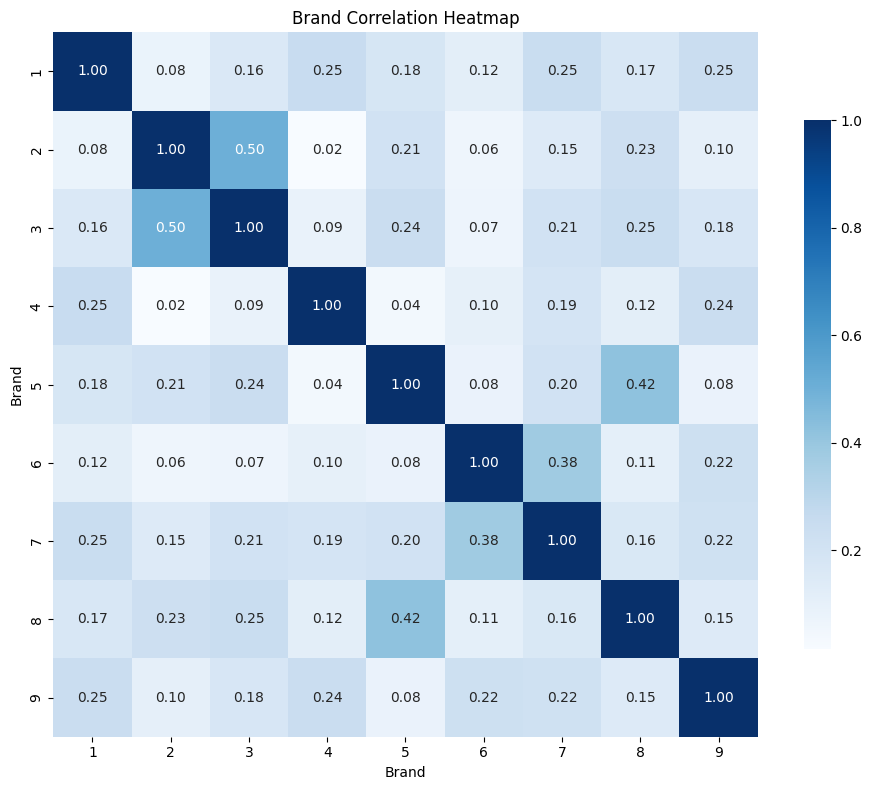

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(brand_correlation, annot=True, cmap="Blues", fmt=".2f", square=True, cbar_kws={"shrink": .75})
plt.title("Brand Correlation Heatmap")
plt.xlabel("Brand")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

# **Retention & Moving Average Analysis**

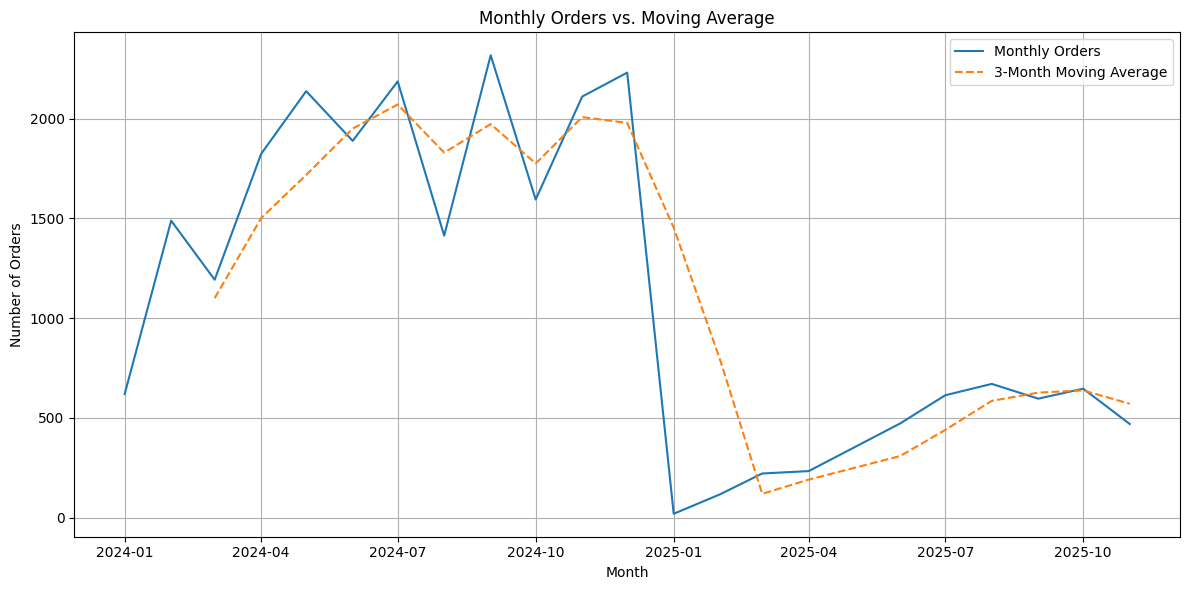

In [22]:
# Moving Average of Orders per Month
monthly_orders = df.groupby(df['Delivered_date'].dt.to_period('M'))['Order_Id'].nunique()
monthly_orders.index = monthly_orders.index.to_timestamp()

# 3-month moving average
moving_avg = monthly_orders.rolling(window=3).mean()

# Plot actual orders and moving average
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders, label='Monthly Orders')
plt.plot(moving_avg, label='3-Month Moving Average', linestyle='--')
plt.title("Monthly Orders vs. Moving Average")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-23-6318d89c8000>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_retention_matrix = customer_retention_matrix.applymap(lambda x: 1 if x > 0 else 0)


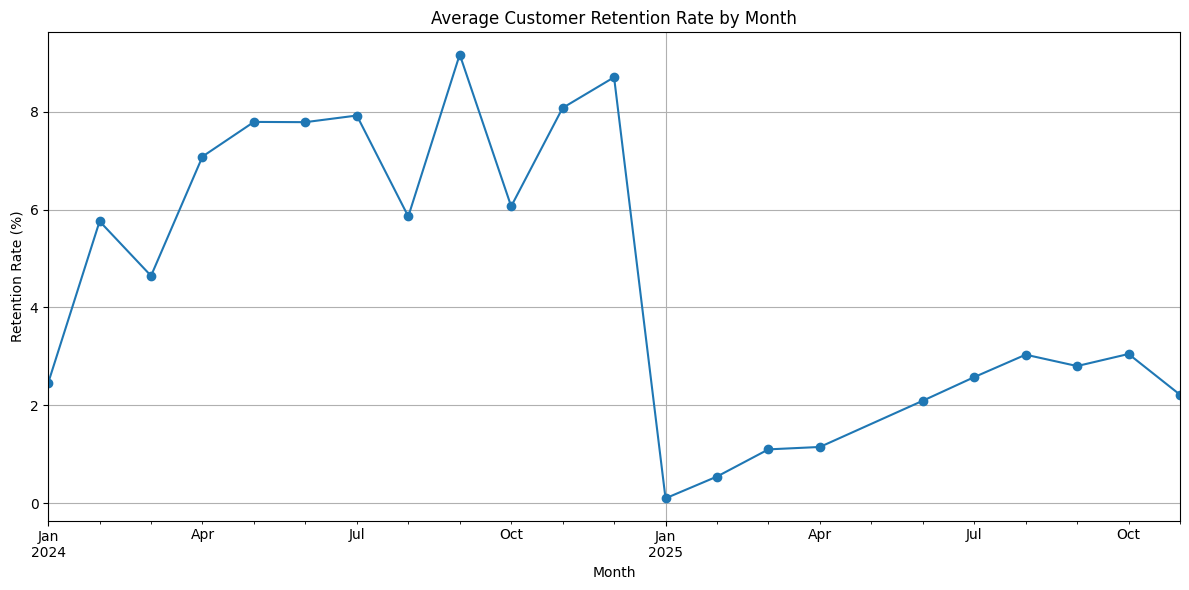

In [23]:
#Customer Retention Analysis

# Extract customer-month pairs
df['Month'] = df['Delivered_date'].dt.to_period('M')
customer_months = df.groupby(['Customer_Phone', 'Month']).size().reset_index(name='Orders')

# Pivot to get a matrix of customer x month with binary indication of order
customer_retention_matrix = customer_months.pivot_table(index='Customer_Phone', columns='Month', values='Orders', fill_value=0)
customer_retention_matrix = customer_retention_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Calculate retention: percentage of customers who returned in each subsequent month
retention_rates = customer_retention_matrix.T.cumsum().diff().fillna(customer_retention_matrix.T.iloc[0])
retention_percent = (retention_rates.T / customer_retention_matrix.sum(axis=1).values.reshape(-1, 1)).T.mean(axis=1) * 100

# Plot retention over time
plt.figure(figsize=(12, 6))
retention_percent.plot(marker='o')
plt.title("Average Customer Retention Rate by Month")
plt.ylabel("Retention Rate (%)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Prepare retention summary table
retention_summary = pd.DataFrame({
    'Month': retention_percent.index.astype(str),
    'Average Retention Rate (%)': retention_percent.round(2).values
}).reset_index(drop=True)

retention_summary

,Month,Average Retention Rate (%)
0,2024-01,2.46
1,2024-02,5.76
2,2024-03,4.65
3,2024-04,7.08
4,2024-05,7.79
5,2024-06,7.79
6,2024-07,7.92
7,2024-08,5.86
8,2024-09,9.17
9,2024-10,6.07


In [25]:
# Filter to the most recent full month in the data
latest_month = df['Delivered_date'].dt.to_period('M').max()
latest_month_data = df[df['Delivered_date'].dt.to_period('M') == latest_month]

# Aggregate total value and order count per customer for that month
buyer_stats = latest_month_data.groupby('Customer_Phone').agg({
    'Order_Id': 'nunique',
    'Redistribution Value': 'sum'
}).reset_index().rename(columns={
    'Order_Id': 'Number_of_Orders',
    'Redistribution Value': 'Total_Value'
})

# Top 10 buyers by value
top_buyers = buyer_stats.sort_values(by='Total_Value', ascending=False).head(10)

# Bottom 10 buyers by value
bottom_buyers = buyer_stats.sort_values(by='Total_Value', ascending=True).head(10)

In [26]:
top_buyers

,Customer_Phone,Number_of_Orders,Total_Value
276,8083880124,1,1102000.0
130,8030676272,2,586200.0
61,7069022669,1,549000.0
256,8066954155,1,540200.0
222,8060306059,1,455050.0
368,8188725410,2,395950.0
295,8107772717,1,392000.0
361,8169282651,1,370000.0
131,8030711563,1,366000.0
171,8035470101,2,361800.0


In [27]:
bottom_buyers

,Customer_Phone,Number_of_Orders,Total_Value
385,9057436042,1,3875.0
86,8022769488,1,3875.0
173,8035589785,1,3875.0
151,8033722781,1,3875.0
14,7032503932,1,3875.0
258,8067072411,1,7400.0
243,8064021864,1,7750.0
411,9163873731,1,8100.0
76,7088890389,1,8100.0
312,8130213368,1,8100.0


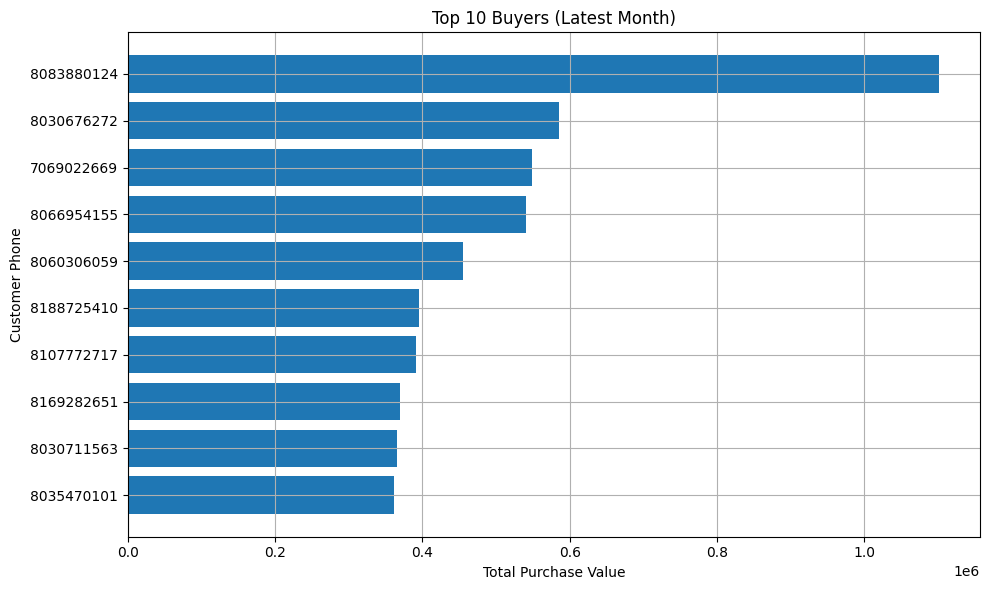

In [28]:
# Top Buyers Plot
plt.figure(figsize=(10, 6))
plt.barh(top_buyers['Customer_Phone'].astype(str), top_buyers['Total_Value'])
plt.xlabel("Total Purchase Value")
plt.ylabel("Customer Phone")
plt.title("Top 10 Buyers (Latest Month)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

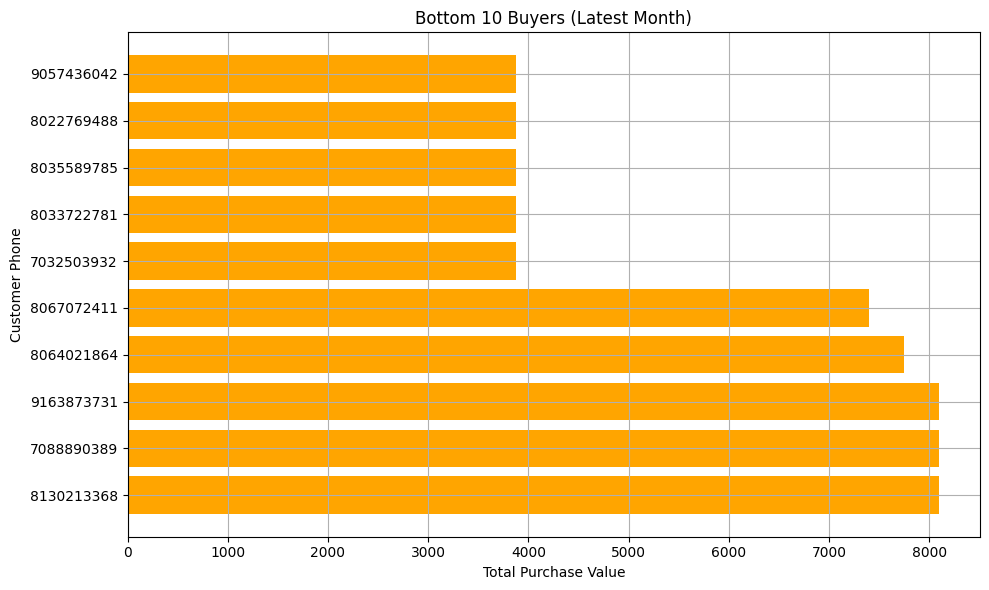

In [29]:
# Bottom Buyers Plot
plt.figure(figsize=(10, 6))
plt.barh(bottom_buyers['Customer_Phone'].astype(str), bottom_buyers['Total_Value'], color='orange')
plt.xlabel("Total Purchase Value")
plt.ylabel("Customer Phone")
plt.title("Bottom 10 Buyers (Latest Month)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Predicting future top buyers using a simple trend model: past total value per customer per month

# Group historical data by customer and month
monthly_customer_value = df.groupby([df['Delivered_date'].dt.to_period('M'), 'Customer_Phone'])['Redistribution Value'].sum().reset_index()
monthly_customer_value.columns = ['Month', 'Customer_Phone', 'Total_Value']

# Pivot to get months as columns and customers as rows
customer_trend = monthly_customer_value.pivot(index='Customer_Phone', columns='Month', values='Total_Value').fillna(0)

# Use average of last 3 months as predictor for the next month
predicted_values = customer_trend.iloc[:, -3:].mean(axis=1).sort_values(ascending=False).head(10)

# Create a DataFrame for display
future_top_buyers = predicted_values.reset_index()
future_top_buyers.columns = ['Customer_Phone', 'Predicted_Next_Month_Value']

future_top_buyers

,Customer_Phone,Predicted_Next_Month_Value
0,7085787673,794000.000000
1,7037250850,474300.000000
2,8028035413,406333.333333
3,8083880124,367333.333333
4,7069022669,269766.666667
5,8188725410,240266.666667
6,8030676272,195400.000000
7,8033039747,183266.666667
8,8066954155,180066.666667
9,8022423689,176666.666667


# **Impact to business**

In [39]:
#Average Monthly Sales
monthly_sales = df.groupby('Month')['Redistribution Value'].sum()
average_monthly_sales = monthly_sales.mean()

print(f"Average Monthly Sales: ₦{average_monthly_sales:,.2f}")

Average Monthly Sales: ₦68,457,228.18


In [40]:
# Assume Improvements
retention_uplift = 0.05  # 5% Retention Uplift
cross_sell_uplift = 0.05 # 5% Cross-Sell Uplift
drop_saving = 0.03       # 3% Drop Loss Saved

# Calculate Impact
retention_impact = average_monthly_sales * retention_uplift
cross_sell_impact = average_monthly_sales * cross_sell_uplift
drop_saving_impact = average_monthly_sales * drop_saving

total_monthly_gain = retention_impact + cross_sell_impact + drop_saving_impact
annual_gain = total_monthly_gain * 12

print(f"Retention Uplift Impact: ₦{retention_impact:,.2f}/month")
print(f"Cross-Sell Uplift Impact: ₦{cross_sell_impact:,.2f}/month")
print(f"Drop Saving Impact: ₦{drop_saving_impact:,.2f}/month")
print(f"Total Monthly Gain: ₦{total_monthly_gain:,.2f}")
print(f"Total Annual Gain: ₦{annual_gain:,.2f}")

Retention Uplift Impact: ₦3,422,861.41/month
Cross-Sell Uplift Impact: ₦3,422,861.41/month
Drop Saving Impact: ₦2,053,716.85/month
Total Monthly Gain: ₦8,899,439.66
Total Annual Gain: ₦106,793,275.96


In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Filter customers with at least 6 months of data for more reliable predictions
customer_monthly = df.groupby([df['Delivered_date'].dt.to_period('M'), 'Customer_Phone'])['Redistribution Value'].sum().reset_index()
customer_monthly.columns = ['Month', 'Customer_Phone', 'Total_Value']

# Get customers with at least 6 months of purchase history
customer_counts = customer_monthly['Customer_Phone'].value_counts()
eligible_customers = customer_counts[customer_counts >= 6].index

# Forecast for top 10 eligible customers by total spend
top_customers = customer_monthly[customer_monthly['Customer_Phone'].isin(eligible_customers)]
top_total = top_customers.groupby('Customer_Phone')['Total_Value'].sum().sort_values(ascending=False).head(10).index

# Apply ETS forecast
predictions = []
for customer in top_total:
    ts = top_customers[top_customers['Customer_Phone'] == customer].set_index('Month')['Total_Value'].sort_index()
    ts.index = ts.index.to_timestamp()

    try:
        model = ExponentialSmoothing(ts, trend='add', seasonal=None, initialization_method="estimated")
        fit = model.fit()
        forecast = fit.forecast(1).iloc[0]
        predictions.append((customer, round(forecast, 2)))
    except:
        predictions.append((customer, None))  # fallback for failed fits

# Create prediction dataframe
ets_predictions = pd.DataFrame(predictions, columns=['Customer_Phone', 'ETS_Predicted_Next_Month_Value'])

ets_predictions

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: V

,Customer_Phone,ETS_Predicted_Next_Month_Value
0,8062580582,814937.28
1,7085787673,1528766.34
2,8032343938,95429.65
3,8032015554,247927.34
4,9064321502,452336.74
5,8083137065,649719.81
6,8022786173,-372333.92
7,8080126502,136505.01
8,8029835705,149779.31
9,8020716900,362759.09


# **Recommedation system**

In [32]:
# Step 1:Creating a User-Item Matrix for Collaborative Filtering
user_item_matrix = df.pivot_table(
    index='Customer_Phone',
    columns='SKU_Code',
    values='Redistribution Value',
    aggfunc='sum'
).fillna(0)

user_item_matrix

SKU_Code,10000001,10000002,10000004,10000010,10000011,10000035,10000063,10000217,10000358,10000360,...,TPBF50_,TPDCP130_,TPMCP35_,TPMFB130,TPMFB130_,TPSAN100_,TPSMCP9_,TPSMFG8.5_,VOB2600E_,VOB4500_
Customer_Phone,,,,,,,,,,,,,,,,,,,,,
7010009941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7010147753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7010301833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7010572000,0.0,37000.0,0.0,0.0,24300.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7010755909,142900.0,16400.0,0.0,0.0,50200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,33000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166785982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9166958284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28800.0,0.0,0.0,0.0,0.0
9166975415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Step 2: Creating  a Content-Based Feature Matrix using Brand info

# Use SKU_Code and Brand from the original dataset
product_features = df[['SKU_Code', 'Brand']].drop_duplicates().set_index('SKU_Code')

# One-hot encode the Brand column to create content features
product_features_encoded = pd.get_dummies(product_features, columns=['Brand'])

product_features_encoded

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Brand_7,Brand_8,Brand_9
SKU_Code,,,,,,,,,
10002778,True,False,False,False,False,False,False,False,False
10002778_ROLL,True,False,False,False,False,False,False,False,False
10002779,True,False,False,False,False,False,False,False,False
10002780,True,False,False,False,False,False,False,False,False
10002780_ROLL,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10000607,False,False,False,False,False,False,False,False,True
10000611,False,False,False,False,False,False,False,False,True
17000391,False,False,False,False,False,False,False,False,True


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 3: Computing for  Similarity Matrices
# Collaborative: User-to-User similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Content-Based: Item-to-Item similarity
item_similarity = cosine_similarity(product_features_encoded)
item_similarity_df = pd.DataFrame(item_similarity, index=product_features_encoded.index, columns=product_features_encoded.index)

# Step 4: Hybrid Recommendation Function
def hybrid_recommend(customer_id, top_n=5):
    if customer_id not in user_item_matrix.index:
        return f"Customer {customer_id} not found in the dataset."

    # Collaborative part: similar users' scores
    similar_users = user_similarity_df[customer_id]
    weighted_ratings = user_item_matrix.T.dot(similar_users).div(similar_users.sum())

    # Content part: products similar to those customer has already purchased
    purchased_products = user_item_matrix.loc[customer_id]
    purchased_skus = purchased_products[purchased_products > 0].index
    content_scores = item_similarity_df[purchased_skus].sum(axis=1)

    # Combine both scores
    hybrid_scores = 0.5 * weighted_ratings + 0.5 * content_scores
    hybrid_scores = hybrid_scores.drop(purchased_skus, errors='ignore')  # Remove already purchased items
    top_recommendations = hybrid_scores.sort_values(ascending=False).head(top_n)

    return top_recommendations.reset_index().rename(columns={0: 'Score', 'index': 'Recommended_SKU'})

# Testing it with a customer from the dataset
sample_customer = user_item_matrix.index[0]
hybrid_recommendations = hybrid_recommend(sample_customer)

hybrid_recommendations

,SKU_Code,Score
0,10000539,22160.866123
1,10000002,21875.399729
2,10002832,18577.795574
3,10002861,16795.577580
4,10000001,12591.014490


In [35]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [36]:
%%writefile app.py


import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
from PIL import Image


logo = Image.open("/content/logo.png")  # Ensure logo.png is in the same directory
st.image(logo, width=120)
st.markdown("<h1 style='text-align: center;'>📊 Sales Intelligence & Product Recommendation Dashboard</h1>", unsafe_allow_html=True)


@st.cache_data
def load_data():
    df = pd.read_csv("/content/drive/MyDrive/Data Analysis - Sample File.csv")
    df['Redistribution Value'] = df['Redistribution Value'].str.replace(',', '').astype(float)
    df['Delivered_date'] = pd.to_datetime(df['Delivered_date'], errors='coerce')
    df['Month'] = df['Delivered_date'].dt.to_period('M')
    return df

df = load_data()

# --- Sidebar Navigation ---
st.sidebar.title("📂 Navigation")
section = st.sidebar.radio("Choose a Section", [
    "📊 EDA Overview",
    "📉 Drop Detection",
    "👤 Customer Profiling",
    "🔁 Cross-Selling",
    "🔗 Brand Correlation",
    "🥇 Buyer Analysis",
    "📈 Retention & Moving Average",
    "🤖 Recommender System"
])

# Shared aggregations
df['Month'] = df['Delivered_date'].dt.to_period('M')
monthly_summary = df.groupby('Month')['Redistribution Value'].sum()

# --- EDA Overview ---
if section == "📊 EDA Overview":
    st.subheader("Sales Trends Over Time")
    monthly_orders = df.groupby(df['Delivered_date'].dt.to_period('M'))['Order_Id'].nunique()
    monthly_orders.index = monthly_orders.index.to_timestamp()
    monthly_summary.index = monthly_summary.index.to_timestamp()
    st.line_chart(monthly_summary)

    st.subheader("Top-Selling Products")
    top_products = df.groupby('SKU_Code')['Redistribution Value'].sum().sort_values(ascending=False).head(10)
    st.bar_chart(top_products)

    st.subheader("Top Brands")
    top_brands = df.groupby('Brand')['Redistribution Value'].sum().sort_values(ascending=False).head(10)
    st.bar_chart(top_brands)

# --- Drop Detection ---
elif section == "📉 Drop Detection":
    st.subheader("Brand-Level Month-over-Month Drop Flags")
    brand_monthly = df.groupby(['Brand', 'Month'])['Redistribution Value'].sum().unstack(fill_value=0)
    brand_mom_change = brand_monthly.pct_change(axis=1) * 100
    drop_flags = brand_mom_change < -30
    drop_summary = brand_mom_change.round(1).astype(str)
    drop_summary[drop_flags] += "% 🔻"
    drop_summary[~drop_flags] = ""
    st.dataframe(drop_summary)

# --- Customer Profiling (RFM) ---
elif section == "👤 Customer Profiling":
    st.subheader("Customer RFM Segmentation")
    ref_date = df['Delivered_date'].max()
    rfm = df.groupby('Customer_Phone').agg({
        'Delivered_date': lambda x: (ref_date - x.max()).days,
        'Order_Id': 'nunique',
        'Redistribution Value': 'sum'
    }).reset_index()
    rfm.columns = ['Customer_Phone', 'Recency', 'Frequency', 'Monetary']

    st.dataframe(rfm.head(10))

# --- Cross-Selling ---
elif section == "🔁 Cross-Selling":
    st.subheader("Brand Switching Patterns (Top 3 Alternatives)")
    last_purchase = df.groupby(['Customer_Phone', 'Brand'])['Month'].max().reset_index()
    latest_month = df['Month'].max()
    drop_customers = last_purchase[last_purchase['Month'] < latest_month]
    merged = df.merge(drop_customers, on='Customer_Phone', suffixes=('', '_dropped'))
    switched = merged[(merged['Month'] > merged['Month_dropped']) & (merged['Brand'] != merged['Brand_dropped'])]
    switches = switched.groupby(['Brand_dropped', 'Brand'])['Order_Id'].count().reset_index().sort_values(['Brand_dropped', 'Order_Id'], ascending=[True, False])
    st.dataframe(switches.groupby('Brand_dropped').head(3))

# --- Brand Correlation ---
elif section == "🔗 Brand Correlation":
    st.subheader("Customer Brand Correlation Matrix")
    user_brand = df.groupby(['Customer_Phone', 'Brand'])['Order_Id'].count().unstack().fillna(0)
    corr = user_brand.corr()
    st.dataframe(corr.round(2))

# --- Buyer Analysis ---
elif section == "🥇 Buyer Analysis":
    st.subheader("Top & Bottom Buyers (Latest Month)")
    latest_month = df['Month'].max()
    latest_data = df[df['Month'] == latest_month]
    buyer_summary = latest_data.groupby('Customer_Phone')['Redistribution Value'].sum().reset_index()
    st.write("Top Buyers")
    st.dataframe(buyer_summary.sort_values(by='Redistribution Value', ascending=False).head(10))
    st.write("Bottom Buyers")
    st.dataframe(buyer_summary.sort_values(by='Redistribution Value').head(10))

# --- Retention & Moving Average ---
elif section == "📈 Retention & Moving Average":
    st.subheader("3-Month Moving Average of Orders")
    monthly_orders = df.groupby('Month')['Order_Id'].nunique()
    ma = monthly_orders.rolling(3).mean()
    st.line_chart(ma)

# --- Recommender System ---
elif section == "🤖 Recommender System":
    st.subheader("Hybrid Product Recommendations")

    user_item_matrix = df.pivot_table(index='Customer_Phone', columns='SKU_Code', values='Redistribution Value', aggfunc='sum').fillna(0)
    product_features = df[['SKU_Code', 'Brand']].drop_duplicates().set_index('SKU_Code')
    product_features_encoded = pd.get_dummies(product_features, columns=['Brand'])

    user_sim = cosine_similarity(user_item_matrix)
    user_sim_df = pd.DataFrame(user_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

    item_sim = cosine_similarity(product_features_encoded)
    item_sim_df = pd.DataFrame(item_sim, index=product_features_encoded.index, columns=product_features_encoded.index)

    def hybrid_recommend(customer_id, top_n=5):
        if customer_id not in user_item_matrix.index:
            return pd.DataFrame({'Error': [f"Customer {customer_id} not found."]})
        sim_users = user_sim_df[customer_id]
        weighted_scores = user_item_matrix.T.dot(sim_users).div(sim_users.sum())
        bought = user_item_matrix.loc[customer_id]
        bought_items = bought[bought > 0].index
        content_scores = item_sim_df[bought_items].sum(axis=1)
        final_scores = 0.5 * weighted_scores + 0.5 * content_scores
        final_scores = final_scores.drop(bought_items, errors='ignore')
        return final_scores.sort_values(ascending=False).head(top_n).reset_index().rename(columns={0: 'Score', 'index': 'Recommended SKU'})

    selected_customer = st.selectbox("Select Customer", user_item_matrix.index)
    if st.button("Show Recommendations"):
        st.dataframe(hybrid_recommend(selected_customer))



Writing app.py


In [37]:
!wget -q -O - ipv4.icanhazip.com

35.196.239.131


In [38]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.239.131:8501

  Stopping...
^C
